<a href="https://colab.research.google.com/github/lakshmant-thota/ml_zoomcamp/blob/master/ml_zoomcamp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv

--2024-10-01 14:43:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.07s   

2024-10-01 14:43:00 (20.8 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [ ]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [ ]:
df.dtypes[df.dtypes == 'object']

,0
make,object
model,object
engine_fuel_type,object
transmission_type,object
driven_wheels,object
market_category,object
vehicle_size,object
vehicle_style,object


In [ ]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [ ]:
len(df.columns)

16

In [ ]:
for col in strings:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

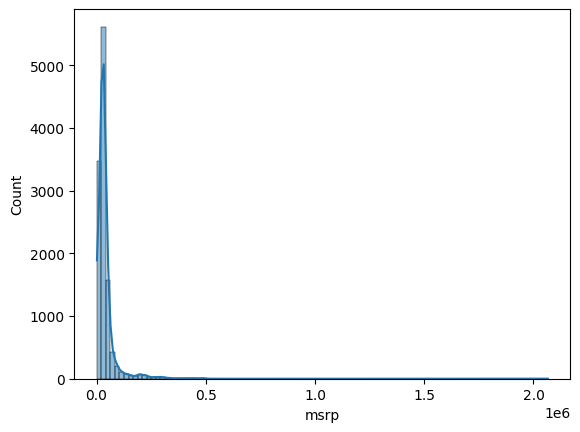

In [ ]:
sns.histplot(df.msrp, bins=100, kde=True)

<Axes: xlabel='year', ylabel='msrp'>

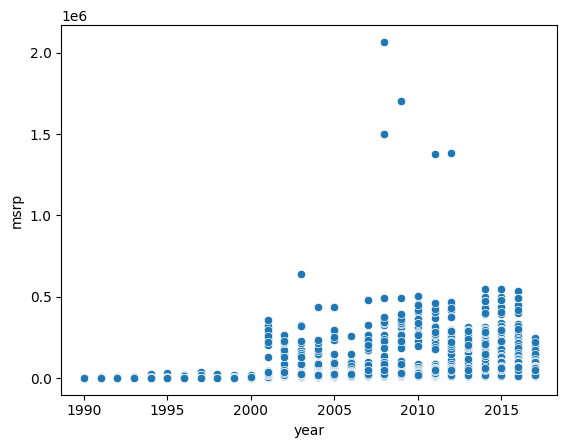

In [ ]:
sns.scatterplot(x=df.year, y=df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

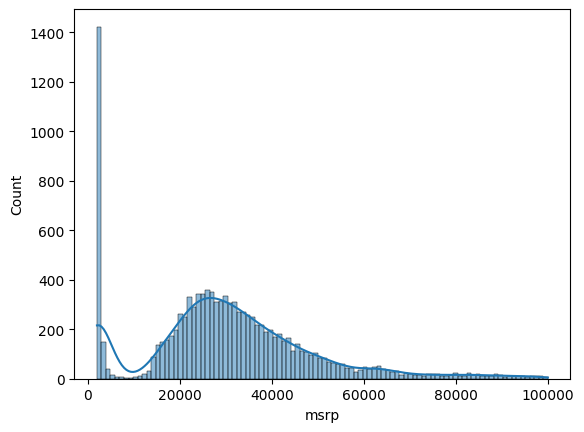

In [ ]:
sns.histplot(df.msrp[df.msrp < 100000], bins=100, kde=True)

In [ ]:
np.log([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<ipython-input-44-2bea43289fd5>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458,
       2.30258509])

In [ ]:
np.log1p([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527])

<Axes: xlabel='msrp', ylabel='Count'>

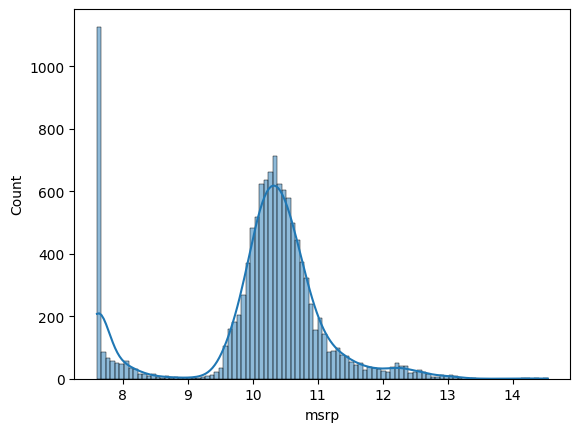

In [ ]:
sns.histplot(np.log(df.msrp), bins=100, kde=True)

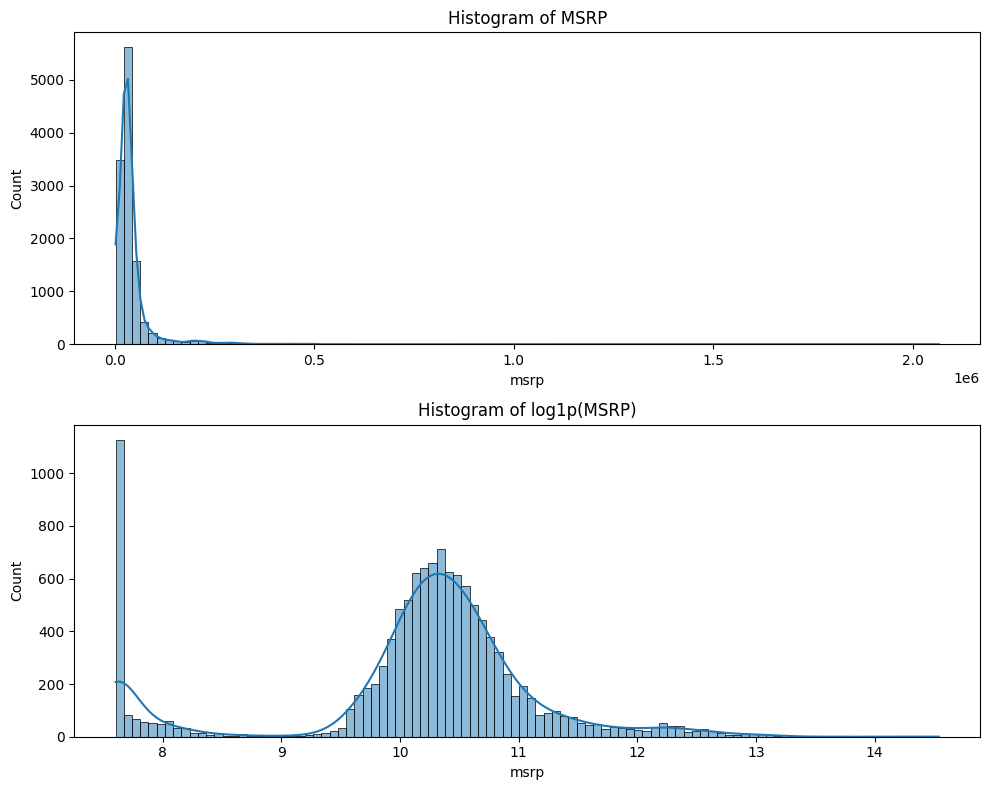

In [ ]:
# prompt: i want to compare the histplot of df.msrp and log1p(df.msrp) in two charts up and down

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(df.msrp, bins=100, kde=True, ax=axs[0])
axs[0].set_title('Histogram of MSRP')

sns.histplot(np.log1p(df.msrp), bins=100, kde=True, ax=axs[1])
axs[1].set_title('Histogram of log1p(MSRP)')

plt.tight_layout()
plt.show()


In [ ]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


# 2.4 Setting up a validation framework


lets build this

In [62]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

In [64]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [66]:
df.iloc[:2]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


we need to shuffle the data before we split so that ther will be different or random data in all the datasets instead of same data.


In [67]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [70]:
idx = np.arange(n)

In [76]:
np.random.seed(2)
np.random.shuffle(idx)

In [77]:
idx

array([2105, 2809, 3388, ..., 1936, 2357,  532])

In [82]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [80]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2105,volvo,c30,2013,regular_unleaded,227.0,5.0,manual,front_wheel_drive,2.0,"hatchback,luxury",compact,2dr_hatchback,29,21,870,25500
2809,chevrolet,colorado,2016,regular_unleaded,200.0,4.0,automatic,rear_wheel_drive,4.0,NaN,compact,extended_cab_pickup,27,20,1385,25980
3388,mazda,cx-7,2011,regular_unleaded,161.0,4.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,28,20,586,21990
1738,mazda,b-series,2001,regular_unleaded,119.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,regular_cab_pickup,24,19,586,14545
7464,volkswagen,passat,2015,diesel,150.0,4.0,manual,front_wheel_drive,4.0,diesel,midsize,sedan,44,30,873,27095


In [83]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [84]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [86]:
np.log1p(df_train.msrp.values)

array([10.14647295, 10.16512078,  9.99838856, ..., 10.73096893,
        9.74096862, 10.69378413])

In [88]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [89]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [91]:
len(y_train)

7150

# Linear Regression Theory

g(x) = y

g is model
x is the training gataset and y is the resulting training output


In [92]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [95]:
df.columns[df.dtypes == 'int']

Index(['year', 'highway_mpg', 'city_mpg', 'popularity', 'msrp'], dtype='object')

g(xi) = wo +w1xi1 + w2xi2 + w3xi3


In [105]:
df_train.iloc[0]

,0
make,volvo
model,c30
year,2013
engine_fuel_type,regular_unleaded
engine_hp,227.0
engine_cylinders,5.0
transmission_type,manual
driven_wheels,front_wheel_drive
number_of_doors,2.0
market_category,"hatchback,luxury"


In [109]:
df_train[['engine_hp','city_mpg','popularity']].iloc[0]

,0
engine_hp,227.0
city_mpg,21.0
popularity,870.0


In [96]:
w0 = 0
w = [1,1,1]

In [97]:
def lr(xi):
  n = len(xi)
  pred = w0
  for j in range(n):
    pred = pred  + w[j] * xi[j]
  return pred

In [100]:
xi = [227,21,870]

In [110]:
lr(xi)

1118

In [130]:
# prompt: # prompt: how to see the msrp in df where engine_hp is equal to 227.0 and city)mpg = 21 and popularity == 870

df[(df.engine_hp == 227.0) & (df.city_mpg == 21) & (df.popularity == 870) & (df.year == 2013)]


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2105,volvo,c30,2013,regular_unleaded,227.0,5.0,manual,front_wheel_drive,2.0,"hatchback,luxury",compact,2dr_hatchback,29,21,870,25500
2106,volvo,c30,2013,regular_unleaded,227.0,5.0,manual,front_wheel_drive,2.0,"hatchback,luxury,performance",compact,2dr_hatchback,29,21,870,27850
